Countries-17
Wineries-1020
Varieties of grapes-21
Flavour groups -13
Taste(keywords)-450


In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib.pyplot import colorbar
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('db/vivino.db')

In [2]:
# Specify the table and column name
table_name = 'wineries'
column_name = 'name'

# Execute a SQL query to retrieve the distinct values in the column
query = "SELECT DISTINCT {} FROM {};".format(column_name, table_name)
pd.read_sql_query(query, conn)



,name
0,Vin Santo di Montepulciano
1,St. Henri Shiraz
2,Siepi
3,Solare Toscana
4,Tenuta Tignanello 'Solaia'
...,...
851,Elevage Branco
852,Moss Blanc Verdicchio dei Castelli di Jesi Cla...
853,Academia Purcari Rară Neagră
854,Paralupi Appassimento


In [3]:
pd.read_sql_query("""SELECT name, COUNT(*) AS frequency
FROM wineries
GROUP BY name
HAVING COUNT(*) > 1;
""", conn)


,name,frequency
0,Amarone della Valpolicella,7
1,Amarone della Valpolicella Classico,10
2,Barolo Brunate,2
3,Barolo Cannubi,2
4,Barolo Cerretta,2
5,Barolo Monvigliero,2
6,Barolo Riserva,2
7,Bienvenues-Bâtard-Montrachet Grand Cru,2
8,Bolgheri Superiore,3
9,Bonnes Mares Grand Cru,2


In [4]:
df = pd.read_sql_query("""
SELECT name, COUNT(*) AS frequency
FROM wineries
GROUP BY name
HAVING COUNT(*) > 4;
""", conn)

df_sorted = df.sort_values(by='frequency', ascending=False)
print(df_sorted)


                                                 name  frequency
2                              Brunello di Montalcino         20
3                      Brunello di Montalcino Riserva         18
8                                             Pomerol         13
1                 Amarone della Valpolicella Classico         10
7                        Corton-Charlemagne Grand Cru         10
6                        Charmes-Chambertin Grand Cru          9
4                                  Cabernet Sauvignon          8
10  Saint-Émilion Grand Cru (Premier Grand Cru Cla...          8
0                          Amarone della Valpolicella          7
5                                Chambertin Grand Cru          5
9                     Saint-Julien (Grand Cru Classé)          5
11                                              Tinto          5


10 wines to increase our sales

In [5]:
df = pd.read_sql_query("""
SELECT name, ratings_average, ratings_count
FROM wines
WHERE ratings_count > 500
ORDER BY ratings_average DESC, ratings_count DESC
LIMIT 10;
""", conn)
df


,name,ratings_average,ratings_count
0,Cabernet Sauvignon,4.8,2941
1,Amarone della Valpolicella Classico Riserva,4.8,587
2,Unico,4.7,45140
3,Sauternes,4.7,44126
4,Special Selection Cabernet Sauvignon,4.7,41236
5,Pomerol,4.7,32157
6,Grange,4.7,24356
7,Toscana,4.7,16284
8,Unico Reserva Especial Edición,4.7,13025
9,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,4.7,9564


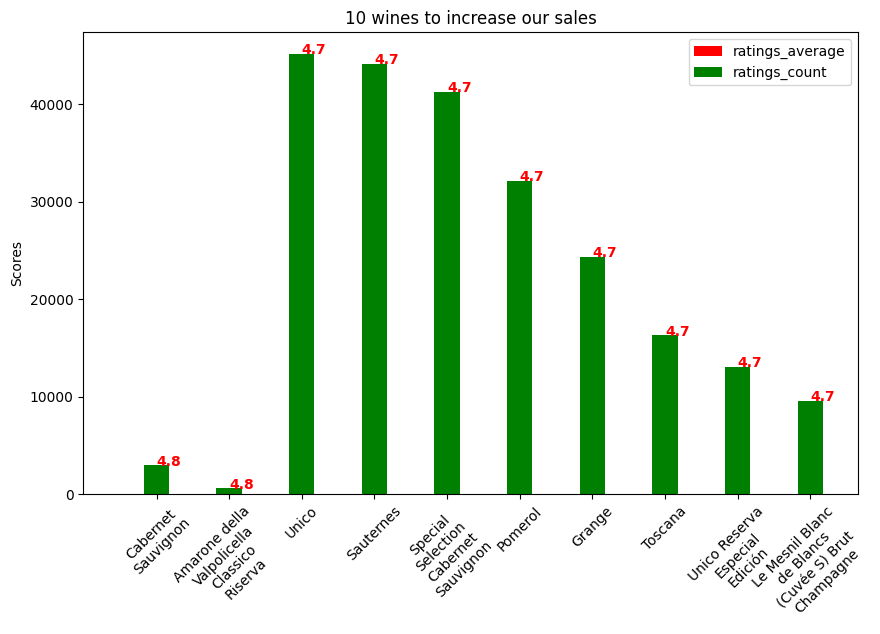

In [6]:
N = len(df)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

yvals = df['ratings_average']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = df['ratings_count']
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width) # Positioning on the x axis (10
ax.set_xticklabels(df['name'])
ax.set_title('10 wines to increase our sales')
ax.legend((rects1[0], rects2[0]), ('ratings_average', 'ratings_count'))

# Add the ratings_average values on top of the green bars
for i, v in enumerate(zvals):
    ax.text(i + width, v + 0.01, str(yvals[i]), color='r', fontweight='bold')

plt.xticks(rotation=45)
import textwrap

# ...

ax.set_xticklabels([textwrap.fill(label, 15) for label in df['name']])

# ...
plt.show()

Country to priorities for promotion with limited budget

In [7]:
df= pd.read_sql_query("""
SELECT countries.name, COUNT(wines.name) AS wine_count, countries.users_count,countries.wineries_count
FROM wines
INNER JOIN regions ON wines.region_id = regions.id
INNER JOIN countries ON regions.country_code = countries.code
GROUP BY countries.name
ORDER BY users_count DESC;
""", conn)
df

,name,wine_count,users_count,wineries_count
0,États-Unis,74,12273684,28145
1,France,331,5973301,67553
2,Italie,383,4270717,42399
3,Allemagne,14,2549989,13643
4,Espagne,94,2264396,18026
5,Suisse,2,1601799,3849
6,Portugal,28,1123535,5834
7,Australie,12,1022965,13946
8,Argentine,23,629532,5339
9,Chili,16,326757,5785


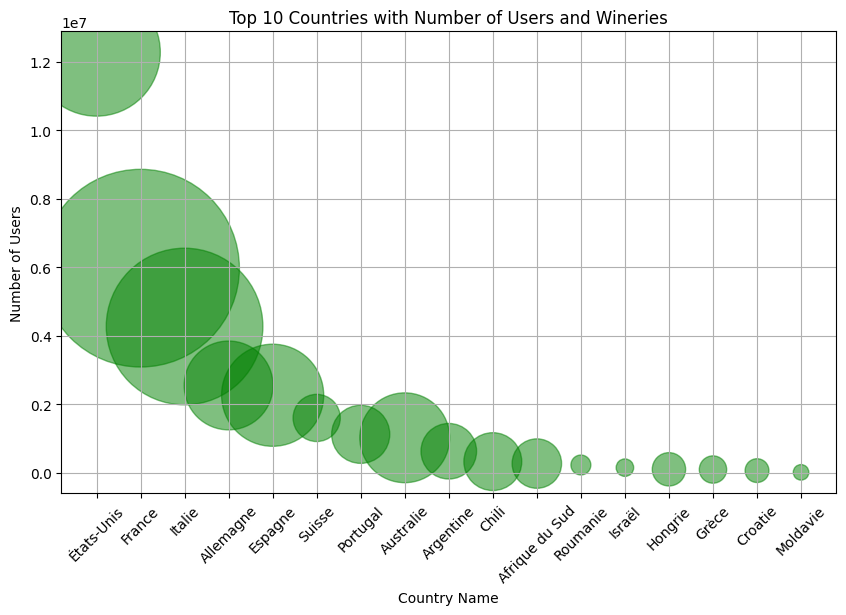

In [8]:
# Define the color 'green'
green = 'green'

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['name'], df['users_count'], s=df['wineries_count']*0.3, color=green, alpha=0.5)
plt.xlabel('Country Name')
plt.ylabel('Number of Users')
plt.title('Top 10 Countries with Number of Users and Wineries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


USA for promotion

awards to the best wineries

In [9]:
pd.read_sql_query("""
    SELECT wines.name AS WineriesName, vintage_toplists_rankings.rank,  wines.ratings_average, wines.ratings_count
    FROM vintage_toplists_rankings
    INNER JOIN vintages ON vintage_toplists_rankings.vintage_id = vintages.id
    INNER JOIN wines ON vintages.wine_id = wines.id
    ORDER BY vintage_toplists_rankings.rank asc, wines.ratings_average DESC, wines.ratings_count DESC LIMIT 10;
""", conn)

,WineriesName,rank,ratings_average,ratings_count
0,Cabernet Sauvignon,1,4.8,2941
1,Toscana,1,4.7,16284
2,Toscana,1,4.7,16284
3,Toscana,1,4.7,16284
4,Toscana,1,4.7,16284
5,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,1,4.7,9564
6,Châteauneuf-du-Pape,1,4.7,7544
7,Châteauneuf-du-Pape,1,4.7,7544
8,Châteauneuf-du-Pape,1,4.7,7544
9,Châteauneuf-du-Pape,1,4.7,7544


This proves duplication of data, so the best three wineries are

In [10]:
pd.read_sql_query("""
    SELECT wines.name AS WineriesName, vintage_toplists_rankings.rank,  wines.ratings_average, wines.ratings_count
    FROM vintage_toplists_rankings
    INNER JOIN vintages ON vintage_toplists_rankings.vintage_id = vintages.id
    INNER JOIN wines ON vintages.wine_id = wines.id
    GROUP BY wines.name
    ORDER BY vintage_toplists_rankings.rank asc, wines.ratings_average DESC, wines.ratings_count DESC LIMIT 3;
""", conn)

,WineriesName,rank,ratings_average,ratings_count
0,Cabernet Sauvignon,1,4.8,2941
1,Toscana,1,4.7,16284
2,Château Margaux (Premier Grand Cru Classé),1,4.6,45350


Wines related with the aroma of _coffee_, _toast_, _green apple_, _cream_, and _citrus_ .

In [11]:
pd.read_sql_query("""SELECT wines.name AS Wine_name, keywords.name AS Aroma,  countries.users_count, keywords_wine.group_name,COUNT(keywords.name) AS Aroma_frequency
FROM keywords
JOIN keywords_wine ON keywords.id = keywords_wine.keyword_id
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
WHERE keywords.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
AND countries.users_count >= 10
GROUP BY Aroma, Wine_name
ORDER BY Aroma, Aroma_frequency DESC;
""", conn)

,Wine_name,Aroma,users_count,group_name,Aroma_frequency
0,Brunello di Montalcino,citrus,4270717,citrus_fruit,15
1,Pomerol,citrus,5973301,citrus_fruit,10
2,Corton-Charlemagne Grand Cru,citrus,5973301,citrus_fruit,8
3,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,citrus,5973301,citrus_fruit,7
4,Amarone della Valpolicella Classico,citrus,4270717,citrus_fruit,6
...,...,...,...,...,...
2507,5 Puttonyos Aszú (Blue Label),toast,102235,microbio,2
2508,25 anni Montefalco Sagrantino,toast,4270717,microbio,2
2509,123 Brunello di Montalcino Riserva,toast,4270717,microbio,2
2510,'Giulio Ferrari' Riserva del Fondatore Rosé,toast,4270717,microbio,2


In [12]:
pd.read_sql_query("""SELECT keywords_wine.keyword_id, wines.name AS Wine_name, keywords.name AS Aroma, keywords_wine.group_name, COUNT(keywords.name) AS Aroma_frequency, countries.users_count
FROM keywords
JOIN keywords_wine ON keywords.id = keywords_wine.keyword_id
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
WHERE keywords.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
AND countries.users_count >= 10
GROUP BY Aroma
ORDER BY Aroma_frequency DESC;
""", conn)

,keyword_id,Wine_name,Aroma,group_name,Aroma_frequency,users_count
0,117,Vin Santo di Montepulciano,coffee,non_oak,1482,4270717
1,417,St. Henri Shiraz,toast,microbio,1354,1022965
2,123,Vin Santo di Montepulciano,cream,microbio,767,4270717
3,106,Vin Santo di Montepulciano,citrus,citrus_fruit,541,4270717
4,195,Tignanello,green apple,tree_fruit,252,4270717


Cluster name - Breakfast enthusiast

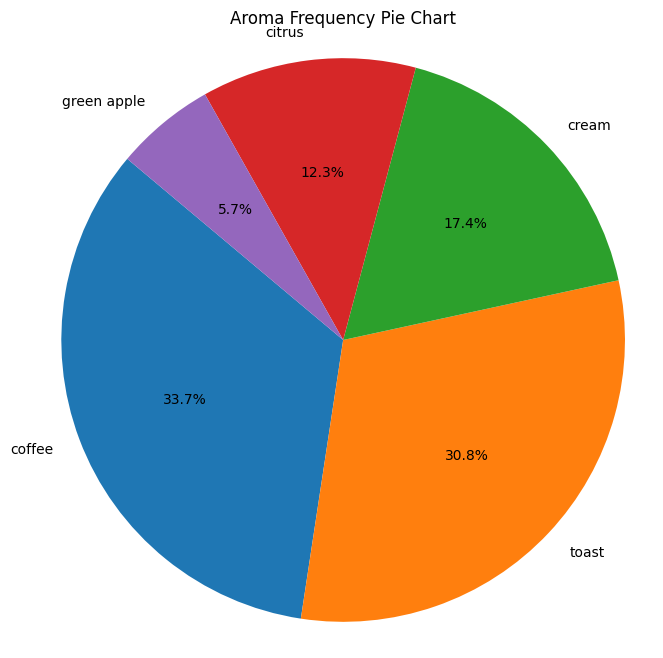

In [13]:
# Execute the SQL query and fetch the data into a DataFrame
query_result = pd.read_sql_query("""
    SELECT keywords_wine.keyword_id, wines.name AS Wine_name, keywords.name AS Aroma, 
           keywords_wine.group_name, COUNT(keywords.name) AS Aroma_frequency, countries.users_count
    FROM keywords
    JOIN keywords_wine ON keywords.id = keywords_wine.keyword_id
    JOIN wines ON keywords_wine.wine_id = wines.id
    JOIN regions ON wines.region_id = regions.id
    JOIN countries ON regions.country_code = countries.code
    WHERE keywords.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
    AND countries.users_count >= 10
    GROUP BY Aroma
    ORDER BY Aroma_frequency DESC;
""", conn)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(query_result['Aroma_frequency'], labels=query_result['Aroma'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Aroma Frequency Pie Chart')
plt.show()


select wines that are easy to find all over the world. **Find the top 3 most common `grape`s all over the world** and **for each grape, give us the the 5 best rated wines**.

No col- wines_count in Table -grapes

In [14]:
pd.read_sql_query("""
SELECT grapes.name AS grape_name, grapes.id AS grape_id, SUM(mugpc.wines_count) AS total_wines_count
FROM grapes
JOIN most_used_grapes_per_country mugpc ON grapes.id = mugpc.grape_id
GROUP BY grapes.name
ORDER BY total_wines_count DESC
LIMIT 3;""", conn)


,grape_name,grape_id,total_wines_count
0,Cabernet Sauvignon,2,9621012
1,Merlot,10,6233909
2,Chardonnay,5,3625248


In [15]:
pd.read_sql_query("""
    SELECT w.name AS wine_name, w.ratings_average, 
            ROW_NUMBER() OVER (PARTITION BY mugpc.grape_id ORDER BY w.ratings_average DESC) AS rank, 
            g.name AS grape_name, mugpc.grape_id
    FROM wines w
    JOIN regions r ON w.region_id = r.id
    JOIN most_used_grapes_per_country mugpc ON r.country_code = mugpc.country_code
    JOIN grapes g ON mugpc.grape_id = g.id
    GROUP BY mugpc.grape_id
    ORDER BY COUNT(*) DESC 
    LIMIT 15
""", conn)


,wine_name,ratings_average,rank,grape_name,grape_id
0,Vin Santo di Montepulciano,4.6,1,Chardonnay,5
1,Vin Santo di Montepulciano,4.6,1,Merlot,10
2,Chardonnay,4.3,1,Pinot Noir,14
3,Vin Santo di Montepulciano,4.6,1,Sangiovese,16
4,St. Henri Shiraz,4.4,1,Cabernet Sauvignon,2
5,Rioja 150 Aniversario,4.2,1,Tempranillo,19
6,Rioja 150 Aniversario,4.2,1,Garnacha,142
7,St. Henri Shiraz,4.4,1,Shiraz/Syrah,1
8,Quinta da Leda Douro,4.4,1,Touriga Nacional,67
9,Quinta da Leda Douro,4.4,1,Touriga Franca,68


Country leaderboard with a visual that shows the **average wine rating for each `country`. 

In [16]:
df = pd.read_sql_query("""SELECT c.name AS country_name, AVG(w.ratings_average) AS Average_Wine_Rating
FROM wines w
JOIN regions r ON w.region_id = r.id
JOIN countries c ON r.country_code = c.code
GROUP BY c.name
ORDER BY Average_Wine_Rating DESC;""", conn)
df

,country_name,Average_Wine_Rating
0,Israël,4.500000
1,Allemagne,4.500000
2,États-Unis,4.490541
3,Moldavie,4.480000
4,Hongrie,4.472727
5,Afrique du Sud,4.459091
6,Australie,4.458333
7,France,4.447130
8,Espagne,4.443617
9,Portugal,4.435714


In [17]:
query = """
SELECT countries.name AS country_name, AVG(wines.ratings_average) AS Average_Wine_Rating, countries.wineries_count AS "No. of Wineries"
FROM wines
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
GROUP BY countries.name
ORDER BY Average_Wine_Rating DESC;
"""
df = pd.read_sql_query(query, conn)
df

,country_name,Average_Wine_Rating,No. of Wineries
0,Israël,4.500000,529
1,Allemagne,4.500000,13643
2,États-Unis,4.490541,28145
3,Moldavie,4.480000,418
4,Hongrie,4.472727,1923
5,Afrique du Sud,4.459091,4227
6,Australie,4.458333,13946
7,France,4.447130,67553
8,Espagne,4.443617,18026
9,Portugal,4.435714,5834


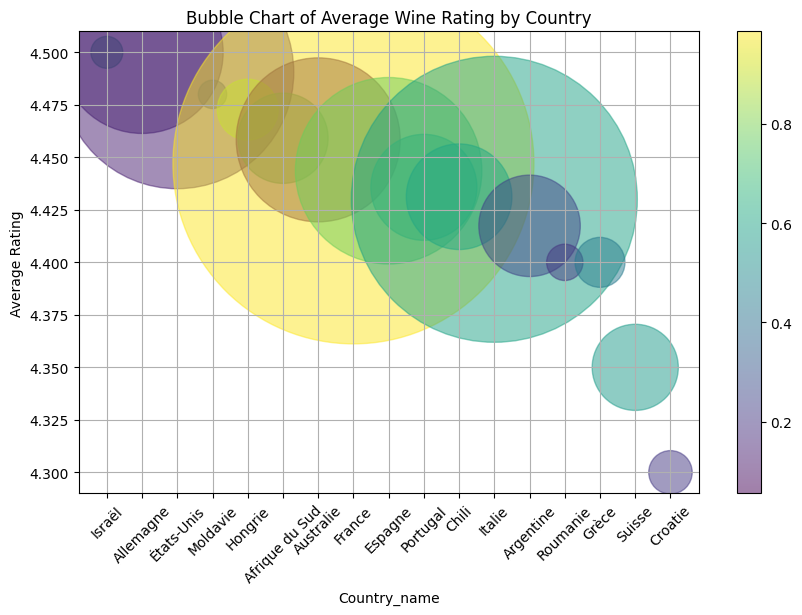

In [18]:
# Define the colors variable
colors = np.random.rand(len(df))


# Plotting the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['country_name'], df['Average_Wine_Rating'],s=df['No. of Wineries'], c=colors, alpha=0.5)
plt.xlabel('Country_name')
plt.ylabel('Average Rating')
plt.title('Bubble Chart of Average Wine Rating by Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.colorbar()
plt.show()




In [19]:
df = df.head(7)

In [20]:
pd.read_sql_query("""
SELECT year, CAST(ROUND(price_euros) AS INTEGER) AS price_euros, COUNT(*) AS frequency
FROM vintages
WHERE year IS NOT NULL AND price_euros IS NOT NULL AND year != 'N.V.'
ORDER BY year, frequency DESC;
""", conn)

,year,price_euros,frequency
0,2005,169,2024


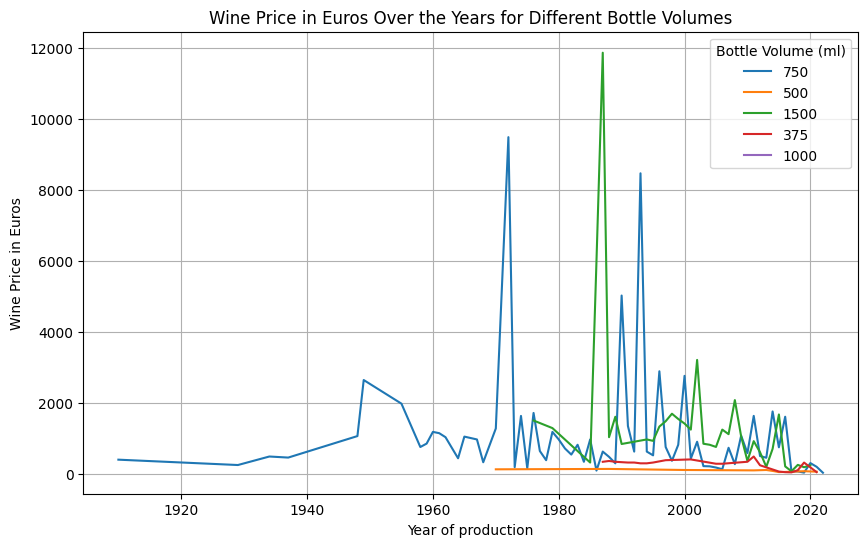

In [21]:
import pandas as pd
df = pd.read_sql_query("""
SELECT year, bottle_volume_ml, ROUND(price_euros) AS Wine_price
FROM vintages
WHERE year != 'N.V.'
GROUP BY year, bottle_volume_ml
ORDER BY year;
""", conn)

# Convert 'year' to integer for plotting
df['year'] = df['year'].astype(int)

# Create a line chart for each category of bottle_volume_ml
plt.figure(figsize=(10, 6))
for volume in df['bottle_volume_ml'].unique():
    subset = df[df['bottle_volume_ml'] == volume]
    plt.plot(subset['year'], subset['Wine_price'], label=str(volume))

plt.xlabel('Year of production')
plt.ylabel('Wine Price in Euros')
plt.title('Wine Price in Euros Over the Years for Different Bottle Volumes')
plt.legend(title='Bottle Volume (ml)')
plt.grid(True)
plt.show()

In [22]:

query = '''
SELECT name, COUNT(*) AS frequency
FROM keywords
GROUP BY name;
'''
df = pd.read_sql_query(query, conn)


# Print the distinct values
print(df)

               name  frequency
0    5-spice powder          1
1            acacia          1
2        acai berry          1
3     aleppo pepper          1
4          allspice          1
..              ...        ...
445     yellow beet          1
446    yellow peach          1
447     yellow plum          1
448   yellow raisin          1
449          yogurt          1

[450 rows x 2 columns]


In [23]:

# Execute the inner join query and fetch the result into a DataFrame
query = """
    SELECT vintage_toplists_rankings.rank, toplists.name, toplists.country_code
    FROM vintage_toplists_rankings
    INNER JOIN toplists ON vintage_toplists_rankings.top_list_id = toplists.id
    ORDER BY vintage_toplists_rankings.rank asc, toplists.name, toplists.country_code LIMIT 50;
"""

df = pd.read_sql_query(query, conn)

# Print the resulting DataFrame
print(df)

    rank                                               name country_code
0      1                             Bestsellers in Córdoba           es
1      1                               Bestsellers in Italy           it
2      1                              Bestsellers in Málaga           es
3      1                           Bestsellers in Salamanca           es
4      1                           Bestsellers in Singapore           sg
5      1                                Bestsellers in Utah           us
6      1  Vivino's 2016 Wine Style Awards: Central Italy...       global
7      1  Vivino's 2016 Wine Style Awards: Italian Barba...       global
8      1  Vivino's 2016 Wine Style Awards: Italian Valpo...       global
9      1  Vivino's 2016 Wine Style Awards: Languedoc-Rou...       global
10     1  Vivino's 2016 Wine Style Awards: Northern Ital...       global
11     1  Vivino's 2016 Wine Style Awards: Southern Rhôn...       global
12     1  Vivino's 2017 Wine Style Awards: Central 

In [24]:
pd.read_sql_query("""SELECT toplists.country_code,toplists.name, vintage_toplists_rankings.rank, vintage_toplists_rankings.previous_rank  
FROM vintage_toplists_rankings
INNER JOIN toplists ON vintage_toplists_rankings.top_list_id = toplists.id
WHERE vintage_toplists_rankings.previous_rank - vintage_toplists_rankings.rank > 0
ORDER BY vintage_toplists_rankings.rank asc;
""", conn)

,country_code,name,rank,previous_rank
0,es,Bestsellers in Málaga,1,11
1,sg,Bestsellers in Singapore,1,12
2,it,Bestsellers in Italy,1,4
3,es,Bestsellers in Córdoba,1,14
4,ie,Bestsellers in Ireland,2,9
5,us,Bestsellers in New Mexico,2,15
6,us,Bestsellers in Tennessee,3,8
7,ca,Bestsellers in Yukon,3,11
8,ca,Bestsellers in British Columbia,4,17
9,de,Bestsellers in Germany,5,12


In [25]:

# Close the connection

conn.close()
